In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math

plots_dir = 'S:\\lab_winter\\martin\\MED14_PRO-seq_final\\plots\\' # directory for output plots

In [2]:
#############################################
#### load in coverages for pausing-index ####
#############################################
## first DMSO
DMSO_TSS_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_DMSO_2h_merged\\refGene_coverage\\MJ-19-30_DMSO_2h_merged_TSSwindow_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_TSS_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
DMSO_genebody_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_DMSO_2h_merged\\refGene_coverage\\MJ-19-30_DMSO_2h_merged_genebody_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_genebody_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
DMSO_TSS_cov['norm_TSS_RPKM'] = DMSO_TSS_cov.norm_TSS_reads/(DMSO_TSS_cov.annotation_length/1000)
DMSO_genebody_cov['norm_genebody_RPKM'] = DMSO_genebody_cov.norm_genebody_reads/(DMSO_genebody_cov.annotation_length/1000)

PI_DMSO_df = DMSO_TSS_cov[["start", "end", "RefSeq_ID", "strand", "norm_TSS_reads", "norm_TSS_RPKM"]]
PI_DMSO_df = PI_DMSO_df.join(DMSO_genebody_cov.iloc[:,[5,9]])

PI_DMSO_df = PI_DMSO_df[PI_DMSO_df.norm_TSS_reads > float(PI_DMSO_df.norm_TSS_reads.quantile(q=0.1))]
PI_DMSO_df = PI_DMSO_df[PI_DMSO_df.norm_genebody_reads > float(PI_DMSO_df.norm_genebody_reads.quantile(q=0.1))]

PI_DMSO_df["pausing_index_DMSO"] = PI_DMSO_df.norm_TSS_RPKM / PI_DMSO_df.norm_genebody_RPKM

## now 2h dTAG7
dTAG_TSS_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_dTAG7_2h_merged\\refGene_coverage\\MJ-19-30_dTAG7_2h_merged_TSSwindow_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_TSS_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
dTAG_genebody_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_dTAG7_2h_merged\\refGene_coverage\\MJ-19-30_dTAG7_2h_merged_genebody_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_genebody_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
dTAG_TSS_cov['norm_TSS_RPKM'] = dTAG_TSS_cov.norm_TSS_reads/(dTAG_TSS_cov.annotation_length/1000)
dTAG_genebody_cov['norm_genebody_RPKM'] = dTAG_genebody_cov.norm_genebody_reads/(dTAG_genebody_cov.annotation_length/1000)

PI_dTAG_df = dTAG_TSS_cov[["start", "end", "RefSeq_ID", "strand", "norm_TSS_reads", "norm_TSS_RPKM"]]
PI_dTAG_df = PI_dTAG_df.join(dTAG_genebody_cov.iloc[:,[5,9]])

PI_dTAG_df = PI_dTAG_df[PI_dTAG_df.norm_TSS_reads > float(PI_dTAG_df.norm_TSS_reads.quantile(q=0.1))]
PI_dTAG_df = PI_dTAG_df[PI_dTAG_df.norm_genebody_reads > float(PI_dTAG_df.norm_genebody_reads.quantile(q=0.1))]

PI_dTAG_df["pausing_index_2h_dTAG7"] = PI_dTAG_df.norm_TSS_RPKM / PI_dTAG_df.norm_genebody_RPKM

plot_df = PI_DMSO_df.join(PI_dTAG_df.iloc[:,-1:])

## now 30min NVP2
NVP2_TSS_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_NVP2_30min_merged\\refGene_coverage\\MJ-19-30_NVP2_30min_merged_TSSwindow_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_TSS_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
NVP2_genebody_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_NVP2_30min_merged\\refGene_coverage\\MJ-19-30_NVP2_30min_merged_genebody_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_genebody_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
NVP2_TSS_cov['norm_TSS_RPKM'] = NVP2_TSS_cov.norm_TSS_reads/(NVP2_TSS_cov.annotation_length/1000)
NVP2_genebody_cov['norm_genebody_RPKM'] = NVP2_genebody_cov.norm_genebody_reads/(NVP2_genebody_cov.annotation_length/1000)

PI_NVP2_df = NVP2_TSS_cov[["start", "end", "RefSeq_ID", "strand", "norm_TSS_reads", "norm_TSS_RPKM"]]
PI_NVP2_df = PI_NVP2_df.join(NVP2_genebody_cov.iloc[:,[5,9]])

PI_NVP2_df = PI_NVP2_df[PI_NVP2_df.norm_TSS_reads > float(PI_NVP2_df.norm_TSS_reads.quantile(q=0.1))]
PI_NVP2_df = PI_NVP2_df[PI_NVP2_df.norm_genebody_reads > float(PI_NVP2_df.norm_genebody_reads.quantile(q=0.1))]

PI_NVP2_df["pausing_index_30min_NVP2"] = PI_NVP2_df.norm_TSS_RPKM / PI_NVP2_df.norm_genebody_RPKM

plot_df = plot_df.join(PI_NVP2_df.iloc[:,-1:])

## now combined 2h dTAG7 + 30min NVP2
combo_TSS_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_dTAG7_NPV2_combo_merged\\refGene_coverage\\MJ-19-30_dTAG7_NPV2_combo_merged_TSSwindow_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_TSS_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
combo_genebody_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_dTAG7_NPV2_combo_merged\\refGene_coverage\\MJ-19-30_dTAG7_NPV2_combo_merged_genebody_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_genebody_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
combo_TSS_cov['norm_TSS_RPKM'] = combo_TSS_cov.norm_TSS_reads/(combo_TSS_cov.annotation_length/1000)
combo_genebody_cov['norm_genebody_RPKM'] = combo_genebody_cov.norm_genebody_reads/(combo_genebody_cov.annotation_length/1000)

PI_combo_df = combo_TSS_cov[["start", "end", "RefSeq_ID", "strand", "norm_TSS_reads", "norm_TSS_RPKM"]]
PI_combo_df = PI_combo_df.join(combo_genebody_cov.iloc[:,[5,9]])

PI_combo_df = PI_combo_df[PI_combo_df.norm_TSS_reads > float(PI_combo_df.norm_TSS_reads.quantile(q=0.1))]
PI_combo_df = PI_combo_df[PI_combo_df.norm_genebody_reads > float(PI_combo_df.norm_genebody_reads.quantile(q=0.1))]

PI_combo_df["pausing_index_combined_dTAG7_NVP2"] = PI_combo_df.norm_TSS_RPKM / PI_combo_df.norm_genebody_RPKM

plot_df = plot_df.join(PI_combo_df.iloc[:,-1:])

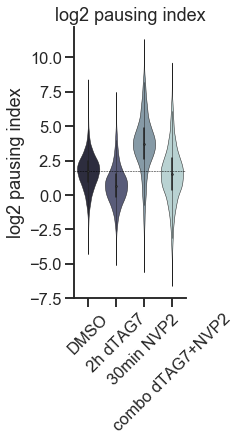

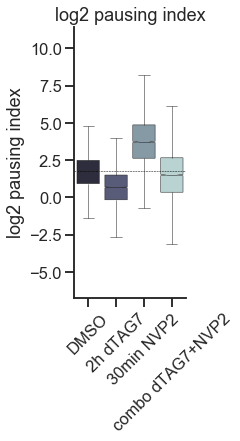

pausing index 	 all_DMSO vs. all_2h_dTAG 	MannwhitneyuResult(statistic=18732318.0, pvalue=0.0)
pausing index 	 all_DMSO vs. all_combo 	MannwhitneyuResult(statistic=28729113.0, pvalue=0.20120784384196305)
pausing index 	 all_2h_dTAG vs. all_combo 	MannwhitneyuResult(statistic=21094185.0, pvalue=2.6478821007740978e-185)


In [7]:
####################################
##### pausing index violinplot #####
####################################

plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(2,5))

plt.axhline(y=np.log2(plot_df.pausing_index_DMSO.median()), linestyle='dashed', linewidth=0.5, color="black")
ax = sns.violinplot(data=np.log2(plot_df.iloc[:,-4:]), linewidth=0.5, scale="width", saturation=1, palette="bone")

plt.title('log2 pausing index')
plt.xticks(rotation=45, ha="center")
ax.set_xticklabels(["DMSO", "2h dTAG7", "30min NVP2", "combo dTAG7+NVP2"])
plt.ylabel('log2 pausing index')

sns.despine()

#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\MJ-19-30_log2_pausing-index_violinplot_2x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\MJ-19-30_log2_pausing-index_violinplot_2x5.png', dpi=300)
plt.show()


####################################
##### pausing index boxplot #####
####################################

plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(2,5))

plt.axhline(y=np.log2(plot_df.pausing_index_DMSO.median()), linestyle='dashed', linewidth=0.5, color="black")
ax = sns.boxplot(data=np.log2(plot_df.iloc[:,-4:]), linewidth=0.5, fliersize=0, notch=True, saturation=1, palette="bone")

plt.title('log2 pausing index')
plt.xticks(rotation=45, ha="center")
ax.set_xticklabels(["DMSO", "2h dTAG7", "30min NVP2", "combo dTAG7+NVP2"])
plt.ylabel('log2 pausing index')

sns.despine()

#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\MJ-19-30_log2_pausing-index_boxplot_2x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\MJ-19-30_log2_pausing-index_boxplot_2x5.png', dpi=300)
plt.show()

print "pausing index \t all_DMSO vs. all_2h_dTAG \t", sc.stats.mannwhitneyu(np.log2(plot_df.pausing_index_DMSO), np.log2(plot_df.pausing_index_2h_dTAG7))
print "pausing index \t all_DMSO vs. all_combo \t", sc.stats.mannwhitneyu(np.log2(plot_df.pausing_index_DMSO), np.log2(plot_df.pausing_index_combined_dTAG7_NVP2))
print "pausing index \t all_2h_dTAG vs. all_combo \t", sc.stats.mannwhitneyu(np.log2(plot_df.pausing_index_2h_dTAG7), np.log2(plot_df.pausing_index_combined_dTAG7_NVP2))

In [3]:
##################################################
#### load in coverages for read-through index ####
##################################################
## first DMSO
DMSO_geneEnd_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_DMSO_2h_merged\\refGene_coverage\\MJ-19-30_DMSO_2h_merged_gene_end_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_geneEnd_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
DMSO_termWindow_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_DMSO_2h_merged\\refGene_coverage\\MJ-19-30_DMSO_2h_merged_termination_window_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_termWindow_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
DMSO_geneEnd_cov['norm_geneEnd_RPKM'] = DMSO_geneEnd_cov.norm_geneEnd_reads/(DMSO_geneEnd_cov.annotation_length/1000)
DMSO_termWindow_cov['norm_termWindow_RPKM'] = DMSO_termWindow_cov.norm_termWindow_reads/(DMSO_termWindow_cov.annotation_length/1000)

RI_DMSO_df = DMSO_geneEnd_cov[["start", "end", "RefSeq_ID", "strand", "norm_geneEnd_reads", "norm_geneEnd_RPKM"]]
RI_DMSO_df = RI_DMSO_df.join(DMSO_termWindow_cov.iloc[:,[5,9]])

RI_DMSO_df = RI_DMSO_df[RI_DMSO_df.norm_geneEnd_reads > float(RI_DMSO_df.norm_geneEnd_reads.quantile(q=0.1))]
RI_DMSO_df = RI_DMSO_df[RI_DMSO_df.norm_termWindow_reads > float(RI_DMSO_df.norm_termWindow_reads.quantile(q=0.1))]

RI_DMSO_df["readthrough_index_DMSO"] = RI_DMSO_df.norm_termWindow_RPKM / RI_DMSO_df.norm_geneEnd_RPKM

## now 2h dTAG7
dTAG_geneEnd_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_dTAG7_2h_merged\\refGene_coverage\\MJ-19-30_dTAG7_2h_merged_gene_end_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_geneEnd_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
dTAG_termWindow_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_dTAG7_2h_merged\\refGene_coverage\\MJ-19-30_dTAG7_2h_merged_termination_window_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_termWindow_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
dTAG_geneEnd_cov['norm_geneEnd_RPKM'] = dTAG_geneEnd_cov.norm_geneEnd_reads/(dTAG_geneEnd_cov.annotation_length/1000)
dTAG_termWindow_cov['norm_termWindow_RPKM'] = dTAG_termWindow_cov.norm_termWindow_reads/(dTAG_termWindow_cov.annotation_length/1000)

RI_dTAG_df = dTAG_geneEnd_cov[["start", "end", "RefSeq_ID", "strand", "norm_geneEnd_reads", "norm_geneEnd_RPKM"]]
RI_dTAG_df = RI_dTAG_df.join(dTAG_termWindow_cov.iloc[:,[5,9]])

RI_dTAG_df = RI_dTAG_df[RI_dTAG_df.norm_geneEnd_reads > float(RI_dTAG_df.norm_geneEnd_reads.quantile(q=0.1))]
RI_dTAG_df = RI_dTAG_df[RI_dTAG_df.norm_termWindow_reads > float(RI_dTAG_df.norm_termWindow_reads.quantile(q=0.1))]

RI_dTAG_df["readthrough_index_2h_dTAG7"] = RI_dTAG_df.norm_termWindow_RPKM / RI_dTAG_df.norm_geneEnd_RPKM

plot_df = RI_DMSO_df.join(RI_dTAG_df.iloc[:,-1:])

## now 30min NVP2
NVP2_geneEnd_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_NVP2_30min_merged\\refGene_coverage\\MJ-19-30_NVP2_30min_merged_gene_end_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_geneEnd_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
NVP2_termWindow_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_NVP2_30min_merged\\refGene_coverage\\MJ-19-30_NVP2_30min_merged_termination_window_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_termWindow_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
NVP2_geneEnd_cov['norm_geneEnd_RPKM'] = NVP2_geneEnd_cov.norm_geneEnd_reads/(NVP2_geneEnd_cov.annotation_length/1000)
NVP2_termWindow_cov['norm_termWindow_RPKM'] = NVP2_termWindow_cov.norm_termWindow_reads/(NVP2_termWindow_cov.annotation_length/1000)

RI_NVP2_df = NVP2_geneEnd_cov[["start", "end", "RefSeq_ID", "strand", "norm_geneEnd_reads", "norm_geneEnd_RPKM"]]
RI_NVP2_df = RI_NVP2_df.join(NVP2_termWindow_cov.iloc[:,[5,9]])

RI_NVP2_df = RI_NVP2_df[RI_NVP2_df.norm_geneEnd_reads > float(RI_NVP2_df.norm_geneEnd_reads.quantile(q=0.1))]
RI_NVP2_df = RI_NVP2_df[RI_NVP2_df.norm_termWindow_reads > float(RI_NVP2_df.norm_termWindow_reads.quantile(q=0.1))]

RI_NVP2_df["readthrough_index_30min_NVP2"] = RI_NVP2_df.norm_termWindow_RPKM / RI_NVP2_df.norm_geneEnd_RPKM

plot_df = plot_df.join(RI_NVP2_df.iloc[:,-1:])

## now combined 2h dTAG7 + 30min NVP2
combo_geneEnd_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_dTAG7_NPV2_combo_merged\\refGene_coverage\\MJ-19-30_dTAG7_NPV2_combo_merged_gene_end_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_geneEnd_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
combo_termWindow_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_dTAG7_NPV2_combo_merged\\refGene_coverage\\MJ-19-30_dTAG7_NPV2_combo_merged_termination_window_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_termWindow_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
combo_geneEnd_cov['norm_geneEnd_RPKM'] = combo_geneEnd_cov.norm_geneEnd_reads/(combo_geneEnd_cov.annotation_length/1000)
combo_termWindow_cov['norm_termWindow_RPKM'] = combo_termWindow_cov.norm_termWindow_reads/(combo_termWindow_cov.annotation_length/1000)

RI_combo_df = combo_geneEnd_cov[["start", "end", "RefSeq_ID", "strand", "norm_geneEnd_reads", "norm_geneEnd_RPKM"]]
RI_combo_df = RI_combo_df.join(combo_termWindow_cov.iloc[:,[5,9]])

RI_combo_df = RI_combo_df[RI_combo_df.norm_geneEnd_reads > float(RI_combo_df.norm_geneEnd_reads.quantile(q=0.1))]
RI_combo_df = RI_combo_df[RI_combo_df.norm_termWindow_reads > float(RI_combo_df.norm_termWindow_reads.quantile(q=0.1))]

RI_combo_df["readthrough_index_combined_dTAG7_NVP2"] = RI_combo_df.norm_termWindow_RPKM / RI_combo_df.norm_geneEnd_RPKM

plot_df = plot_df.join(RI_combo_df.iloc[:,-1:])


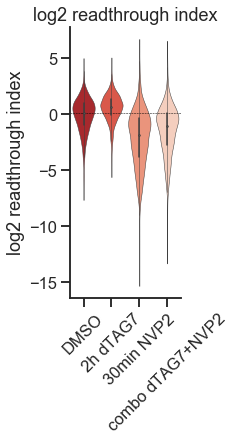

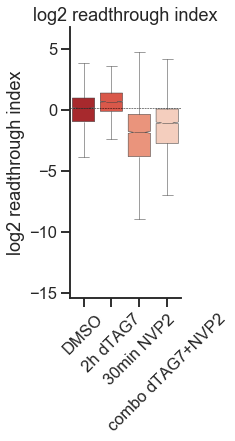

readthrough index 	 all_DMSO vs. all_2h_dTAG 	MannwhitneyuResult(statistic=11013957.0, pvalue=1.438706112598321e-151)
readthrough index 	 all_DMSO vs. all_combo 	MannwhitneyuResult(statistic=11756683.0, pvalue=1.0056220750626049e-105)
readthrough index 	 all_2h_dTAG vs. all_combo 	MannwhitneyuResult(statistic=8627525.5, pvalue=0.0)


In [4]:
########################################
##### readthrough index violinplot #####
########################################

plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(2,5))

plt.axhline(y=np.log2(plot_df.readthrough_index_DMSO.median()), linestyle='dashed', linewidth=0.5, color="black")
ax = sns.violinplot(data=np.log2(plot_df.iloc[:,-4:]), linewidth=0.5, scale="width", palette="Reds_r")

plt.title('log2 readthrough index')
plt.xticks(rotation=45, ha="center")
ax.set_xticklabels(["DMSO", "2h dTAG7", "30min NVP2", "combo dTAG7+NVP2"])
plt.ylabel('log2 readthrough index')

sns.despine()

#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\MJ-19-30_log2_readthrough-index_violinplot_2x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\MJ-19-30_log2_readthrough-index_violinplot_2x5.png', dpi=300)
plt.show()


#####################################
##### readthrough index boxplot #####
#####################################

plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(2,5))

plt.axhline(y=np.log2(plot_df.readthrough_index_DMSO.median()), linestyle='dashed', linewidth=0.5, color="black")
ax = sns.boxplot(data=np.log2(plot_df.iloc[:,-4:]), linewidth=0.5, fliersize=0, notch=True, palette="Reds_r")

plt.title('log2 readthrough index')
plt.xticks(rotation=45, ha="center")
ax.set_xticklabels(["DMSO", "2h dTAG7", "30min NVP2", "combo dTAG7+NVP2"])
plt.ylabel('log2 readthrough index')

sns.despine()

#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\MJ-19-30_log2_readthrough-index_boxplot_2x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\MJ-19-30_log2_readthrough-index_boxplot_2x5.png', dpi=300)
plt.show()

print "readthrough index \t all_DMSO vs. all_2h_dTAG \t", sc.stats.mannwhitneyu(np.log2(plot_df.readthrough_index_DMSO), np.log2(plot_df.readthrough_index_2h_dTAG7))
print "readthrough index \t all_DMSO vs. all_combo \t", sc.stats.mannwhitneyu(np.log2(plot_df.readthrough_index_DMSO), np.log2(plot_df.readthrough_index_combined_dTAG7_NVP2))
print "readthrough index \t all_2h_dTAG vs. all_combo \t", sc.stats.mannwhitneyu(np.log2(plot_df.readthrough_index_2h_dTAG7), np.log2(plot_df.readthrough_index_combined_dTAG7_NVP2))

In [3]:
DMSO_genebody_cov

,chr,start,end,RefSeq_ID,strand,norm_genebody_reads,num_bases_covered,annotation_length,fraction_bases_covered,norm_genebody_RPKM
gene_name,,,,,,,,,,
NOC2L,chr1,944202,958799,NM_015658,-,1166.8800,1739,14597,0.119134,79.939714
C1orf159,chr1,1081817,1115856,NM_017891,-,1856.1200,3055,34039,0.089750,54.529216
SDF4,chr1,1216907,1231567,NM_016547,-,1141.3100,1767,14660,0.120532,77.851978
B3GALT6,chr1,1232748,1235040,NM_080605,+,394.3220,445,2292,0.194154,172.042757
UBE2J2,chr1,1253911,1273354,NM_194458,-,2718.1800,3302,19443,0.169830,139.802500
INTS11,chr1,1311584,1324187,NM_017871,-,1099.2400,1546,12603,0.122669,87.220503
CCNL2,chr1,1385710,1397842,NM_001350497,-,1503.8700,1878,12132,0.154797,123.958952
MRPL20,chr1,1401895,1406813,NM_017971,-,1031.1800,1055,4918,0.214518,209.674664
ATAD3B,chr1,1478614,1496204,NM_001317238,+,1715.8800,2270,17590,0.129051,97.548607


In [4]:
dTAG_genebody_cov

,chr,start,end,RefSeq_ID,strand,norm_genebody_reads,num_bases_covered,annotation_length,fraction_bases_covered,norm_genebody_RPKM
gene_name,,,,,,,,,,
NOC2L,chr1,944202,958799,NM_015658,-,368.2940,958,14597,0.065630,25.230801
C1orf159,chr1,1081817,1115856,NM_017891,-,942.9970,2395,34039,0.070361,27.703428
SDF4,chr1,1216907,1231567,NM_016547,-,636.2680,1479,14660,0.100887,43.401637
B3GALT6,chr1,1232748,1235040,NM_080605,+,125.3300,293,2292,0.127836,54.681501
UBE2J2,chr1,1253911,1273354,NM_194458,-,1105.4300,2353,19443,0.121020,56.854909
INTS11,chr1,1311584,1324187,NM_017871,-,659.3560,1413,12603,0.112116,52.317385
CCNL2,chr1,1385710,1397842,NM_001350497,-,878.6830,1725,12132,0.142186,72.426888
MRPL20,chr1,1401895,1406813,NM_017971,-,383.6850,740,4918,0.150468,78.016470
ATAD3B,chr1,1478614,1496204,NM_001317238,+,506.8160,1238,17590,0.070381,28.812735


In [44]:
DMSO1h_genebody_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-14_DMSO_1h_merged\\refGene_coverage\\MJ-19-14_DMSO_1h_merged_genebody_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_genebody_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
dTAG1h_genebody_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-14_dTAG7_1h_merged\\refGene_coverage\\MJ-19-14_dTAG7_1h_merged_genebody_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_genebody_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
SE_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\SE_464_genes.xlsx')
CRC_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\autoregulatory_6motifs_24_genes.xlsx')
log2FC = np.log2(dTAG1h_genebody_cov.norm_genebody_reads / DMSO1h_genebody_cov.norm_genebody_reads)

C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """


In [33]:
DMSO1h_genebody_cov[~DMSO1h_genebody_cov.index.isin(SE_genes.gene_name.tolist())].describe()

,start,end,norm_genebody_reads,num_bases_covered,annotation_length,fraction_bases_covered
count,8.984000e+03,8.984000e+03,8984.000000,8984.000000,8984.000000,8984.000000
mean,7.432828e+07,7.437683e+07,1863.527172,3232.616429,48553.954475,0.082326
std,5.487534e+07,5.487965e+07,2386.009076,4061.972863,68894.383587,0.052693
min,4.697800e+04,5.313200e+04,0.000000,0.000000,1504.000000,0.000000
25%,3.248702e+07,3.253518e+07,422.965000,757.000000,10479.750000,0.049991
50%,5.989700e+07,5.994511e+07,1100.300000,1907.500000,26112.000000,0.074154
75%,1.096089e+08,1.096460e+08,2373.847500,4134.000000,58171.250000,0.104315
max,2.489067e+08,2.489191e+08,36410.000000,48368.000000,817080.000000,0.539635


In [39]:
clean_log2FC = log2FC.replace([np.inf, -np.inf], np.nan).dropna()

In [47]:
clean_log2FC[~clean_log2FC.index.isin(SE_genes.gene_name.tolist())].describe()

count    8735.000000
mean       -0.694782
std         0.429388
min        -4.993415
25%        -0.876593
50%        -0.648994
75%        -0.457685
max         3.209526
Name: norm_genebody_reads, dtype: float64

In [5]:
plot_df

,start,end,RefSeq_ID,strand,norm_geneEnd_reads,norm_geneEnd_RPKM,norm_termWindow_reads,norm_termWindow_RPKM,readthrough_index_DMSO,readthrough_index_2h_dTAG7,readthrough_index_30min_NVP2,readthrough_index_combined_dTAG7_NVP2
gene_name,,,,,,,,,,,,
SDF4,1216907,1217907,NM_016547,-,95.2808,95.2808,52.3838,17.461267,0.183261,NaN,0.015831,0.016414
B3GALT6,1234040,1235040,NM_080605,+,229.3340,229.3340,219.4350,73.145000,0.318945,0.562278,NaN,NaN
UBE2J2,1253911,1254911,NM_194458,-,157.5640,157.5640,261.0940,87.031333,0.552355,0.341380,0.006792,0.004789
INTS11,1311584,1312584,NM_017871,-,140.6530,140.6530,134.0530,44.684333,0.317692,0.264957,0.288618,0.319728
CCNL2,1385710,1386710,NM_001350497,-,252.0200,252.0200,86.6189,28.872967,0.114566,0.219392,0.020202,0.054680
ATAD3B,1495204,1496204,NM_001317238,+,196.7490,196.7490,287.0800,95.693333,0.486373,0.797838,0.158002,0.280769
ATAD3A,1533687,1534687,NM_001170536,+,85.3815,85.3815,50.3215,16.773833,0.196457,NaN,NaN,0.020833
SSU72,1541672,1542672,NM_014188,-,78.7820,78.7820,255.3200,85.106667,1.080281,0.362121,0.016408,0.026882
GNB1,1785284,1786284,NM_002074,-,120.8540,120.8540,1192.8700,397.623333,3.290113,3.631082,0.033599,0.087041


In [7]:
sc.stats.mannwhitneyu?